<a href="https://colab.research.google.com/github/Dharshan465/TNSDC-Generative-AI/blob/main/recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import necessary libraries
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [15]:
# Define constants and paths
im_shape = (256,256)
TRAINING_DIR = r'/content/drive/MyDrive/Colab Notebooks/dataset/train'
TEST_DIR = r'/content/drive/MyDrive/Colab Notebooks/dataset/test'
seed = 5
BATCH_SIZE = 2
epochs = 10

In [16]:
data_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
    class_mode='categorical', batch_size=BATCH_SIZE, subset="training"
)

validation_generator = val_data_generator.flow_from_directory(
    TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
    class_mode='categorical', batch_size=BATCH_SIZE, subset="validation"
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
    class_mode='categorical', batch_size=BATCH_SIZE
)
global num_classes, nb_train_samples, nb_validation_samples, nb_test_samples, classes

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes = len(classes)

Found 3200 images belonging to 80 classes.
Found 798 images belonging to 80 classes.
Found 958 images belonging to 80 classes.
Classes: ['Adhirasam', 'Aloo Gobi', 'Aloo Matar', 'Aloo Methi', 'Aloo Shimla Mirch', 'Aloo Tikki', 'Anarsa', 'Ariselu', 'Basundi', 'Bhatura', 'Bhindi Masala', 'Biryani', 'Boondi', 'Butter Chicken', 'Chak Hao Kheer', 'Cham Cham', 'Chana Masala', 'Chapati', 'Chhena Kheeri', 'Chicken Razala', 'Chicken Tikka', 'Chicken Tikka Masala', 'Chikki', 'Daal Baati Churma', 'Daal Puri', 'Dal Makhani', 'Dal Tadka', 'Dharwad Pedha', 'Doodhpak', 'Double Ka Meetha', 'Dum Aloo', 'Gajar Ka Halwa', 'Gavvalu', 'Ghevar', 'Gulab Jamun', 'Imarti', 'Jalebi', 'Kachori', 'Kadai Paneer', 'Kadhi Pakoda', 'Kajjikaya', 'Kakinada Khaja', 'Kalakand', 'Karela Bharta', 'Kofta', 'Kuzhi Paniyaram', 'Laddu', 'Lassi', 'Ledikeni', 'Litti Chokha', 'Lyangcha', 'Maach Jhol', 'Makki Di Roti Sarson Da Saag', 'Malapua', 'Misi Roti', 'Misti Doi', 'Modak', 'Mysore Pak', 'Naan', 'Navrattan Korma', 'Palak Panee

In [17]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(im_shape[0], im_shape[1], 3))
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(filepath='model/best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    #keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
]

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // BATCH_SIZE,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=nb_validation_samples // BATCH_SIZE
)


Epoch 1/10
1600/1600 [==============================] - ETA: 0s - loss: 4.4350 - accuracy: 0.0106
Epoch 1: val_accuracy improved from -inf to 0.01504, saving model to model/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1600/1600 [==============================] - 1361s 837ms/step - loss: 4.4350 - accuracy: 0.0106 - val_loss: 5.4338 - val_accuracy: 0.0150
Epoch 2/10
1600/1600 [==============================] - ETA: 0s - loss: 4.3907 - accuracy: 0.0081
Epoch 2: val_accuracy improved from 0.01504 to 0.01629, saving model to model/best_model.h5
1600/1600 [==============================] - 228s 143ms/step - loss: 4.3907 - accuracy: 0.0081 - val_loss: 4.3757 - val_accuracy: 0.0163
Epoch 3/10
1600/1600 [==============================] - ETA: 0s - loss: 4.3858 - accuracy: 0.0122
Epoch 3: val_accuracy did not improve from 0.01629
1600/1600 [==============================] - 224s 140ms/step - loss: 4.3858 - accuracy: 0.0122 - val_loss: 4.7437 - val_accuracy: 0.0163
Epoch 4/10
1600/1600 [==============================] - ETA: 0s - loss: 4.3838 - accuracy: 0.0181
Epoch 4: val_accuracy improved from 0.01629 to 0.01880, saving model to model/best_model.h5
1600/1600 [==============================] - 229s 143ms/ste

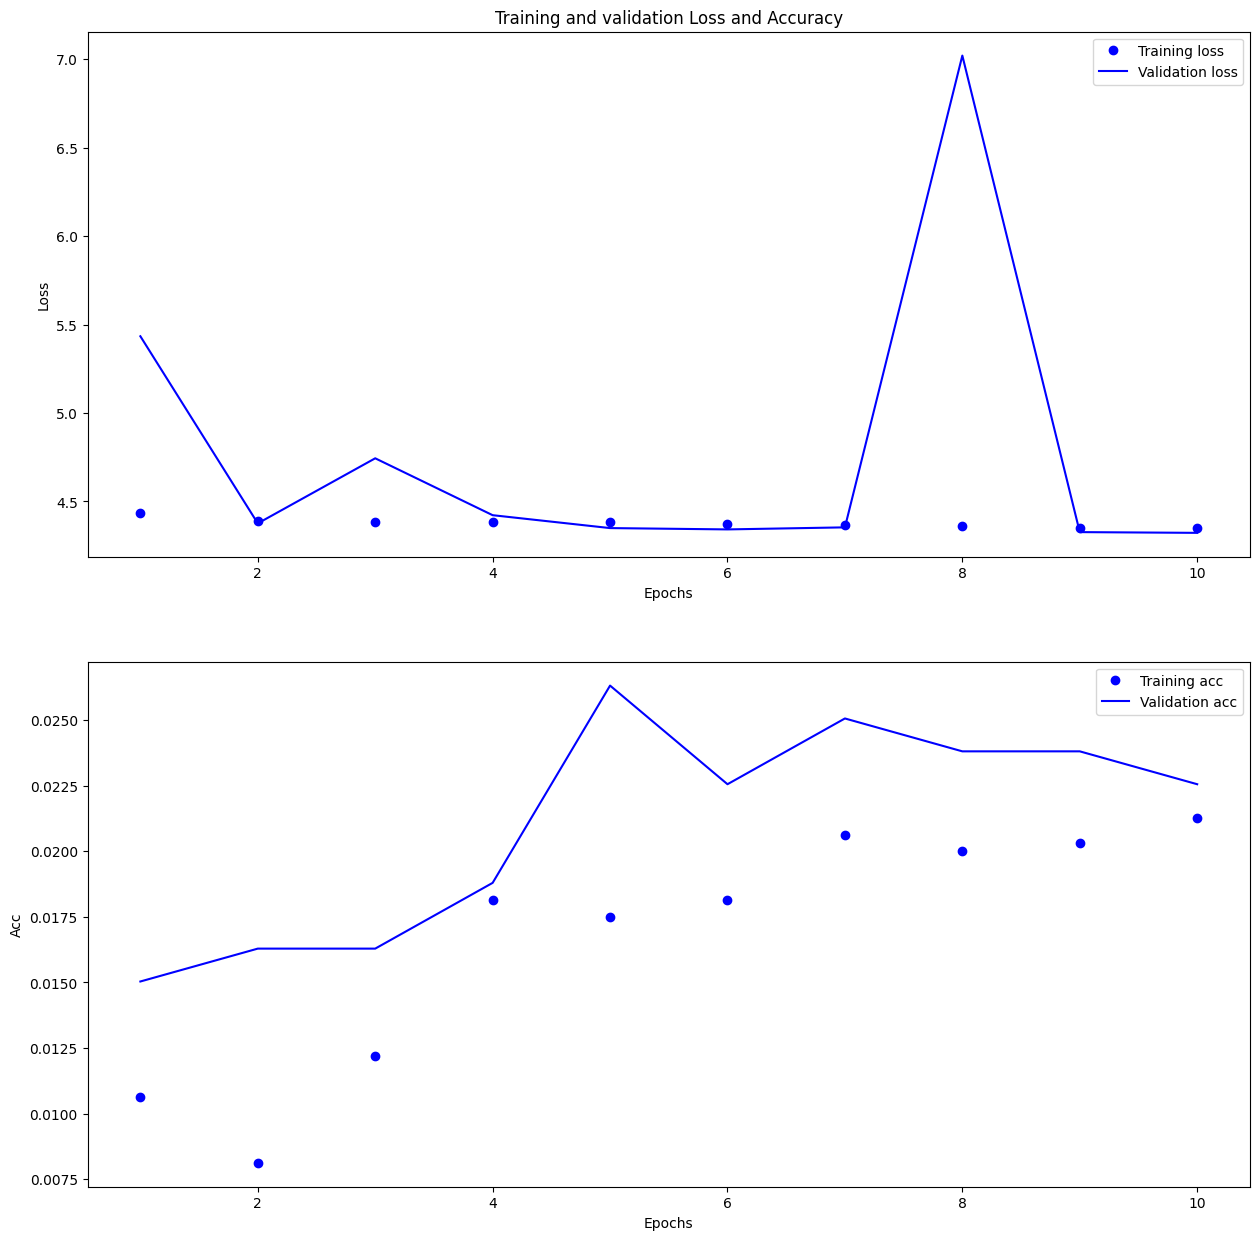

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [20]:
best_model = keras.models.load_model('model/best_model.h5')
score_val = best_model.evaluate(validation_generator)
score_test = best_model.evaluate(test_generator)

479/479 [==============================] - 319s 666ms/step - loss: 4.3560 - accuracy: 0.0230


In [21]:
print('Validation loss:', score_val[0])
print(f'\nValidation accuracy:{round(score_val[1]*100,2)}%')

print('\nTest loss:', score_test[0])
print(f'\nTest accuracy:{round(score_test[1]*100,2)}%')

Validation loss: 4.34908390045166

Validation accuracy:2.63%

Test loss: 4.355978488922119

Test accuracy:2.3%


1/1 [==============================] - 0s 34ms/step


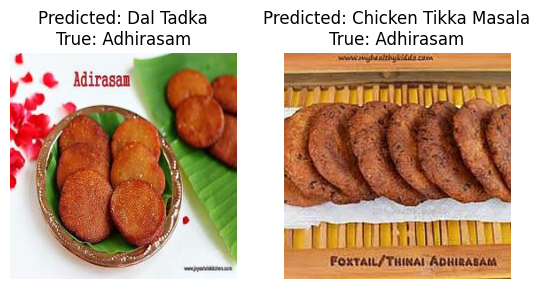

In [26]:
def plot_test_images_with_predictions(model, test_generator, num_images=9):
    test_images, true_labels = test_generator.next()
    predictions = model.predict(test_images)
    predicted_labels = [classes[np.argmax(pred)] for pred in predictions]

    plt.figure(figsize=(10, 10))
    for i in range(2):
        plt.subplot(3, 3, i + 1)
        plt.imshow(test_images[i])
        plt.title(f'Predicted: {predicted_labels[i]}\nTrue: {classes[np.argmax(true_labels[i])]}')
        plt.axis('off')

    plt.show()

# Plot test images with predictions
plot_test_images_with_predictions(best_model, test_generator, num_images=9)


In [23]:
test_images, true_labels = test_generator.next()
print(f"Number of test images: {len(test_images)}")

Number of test images: 2


In [28]:
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

479/479 [==============================] - 25s 43ms/step


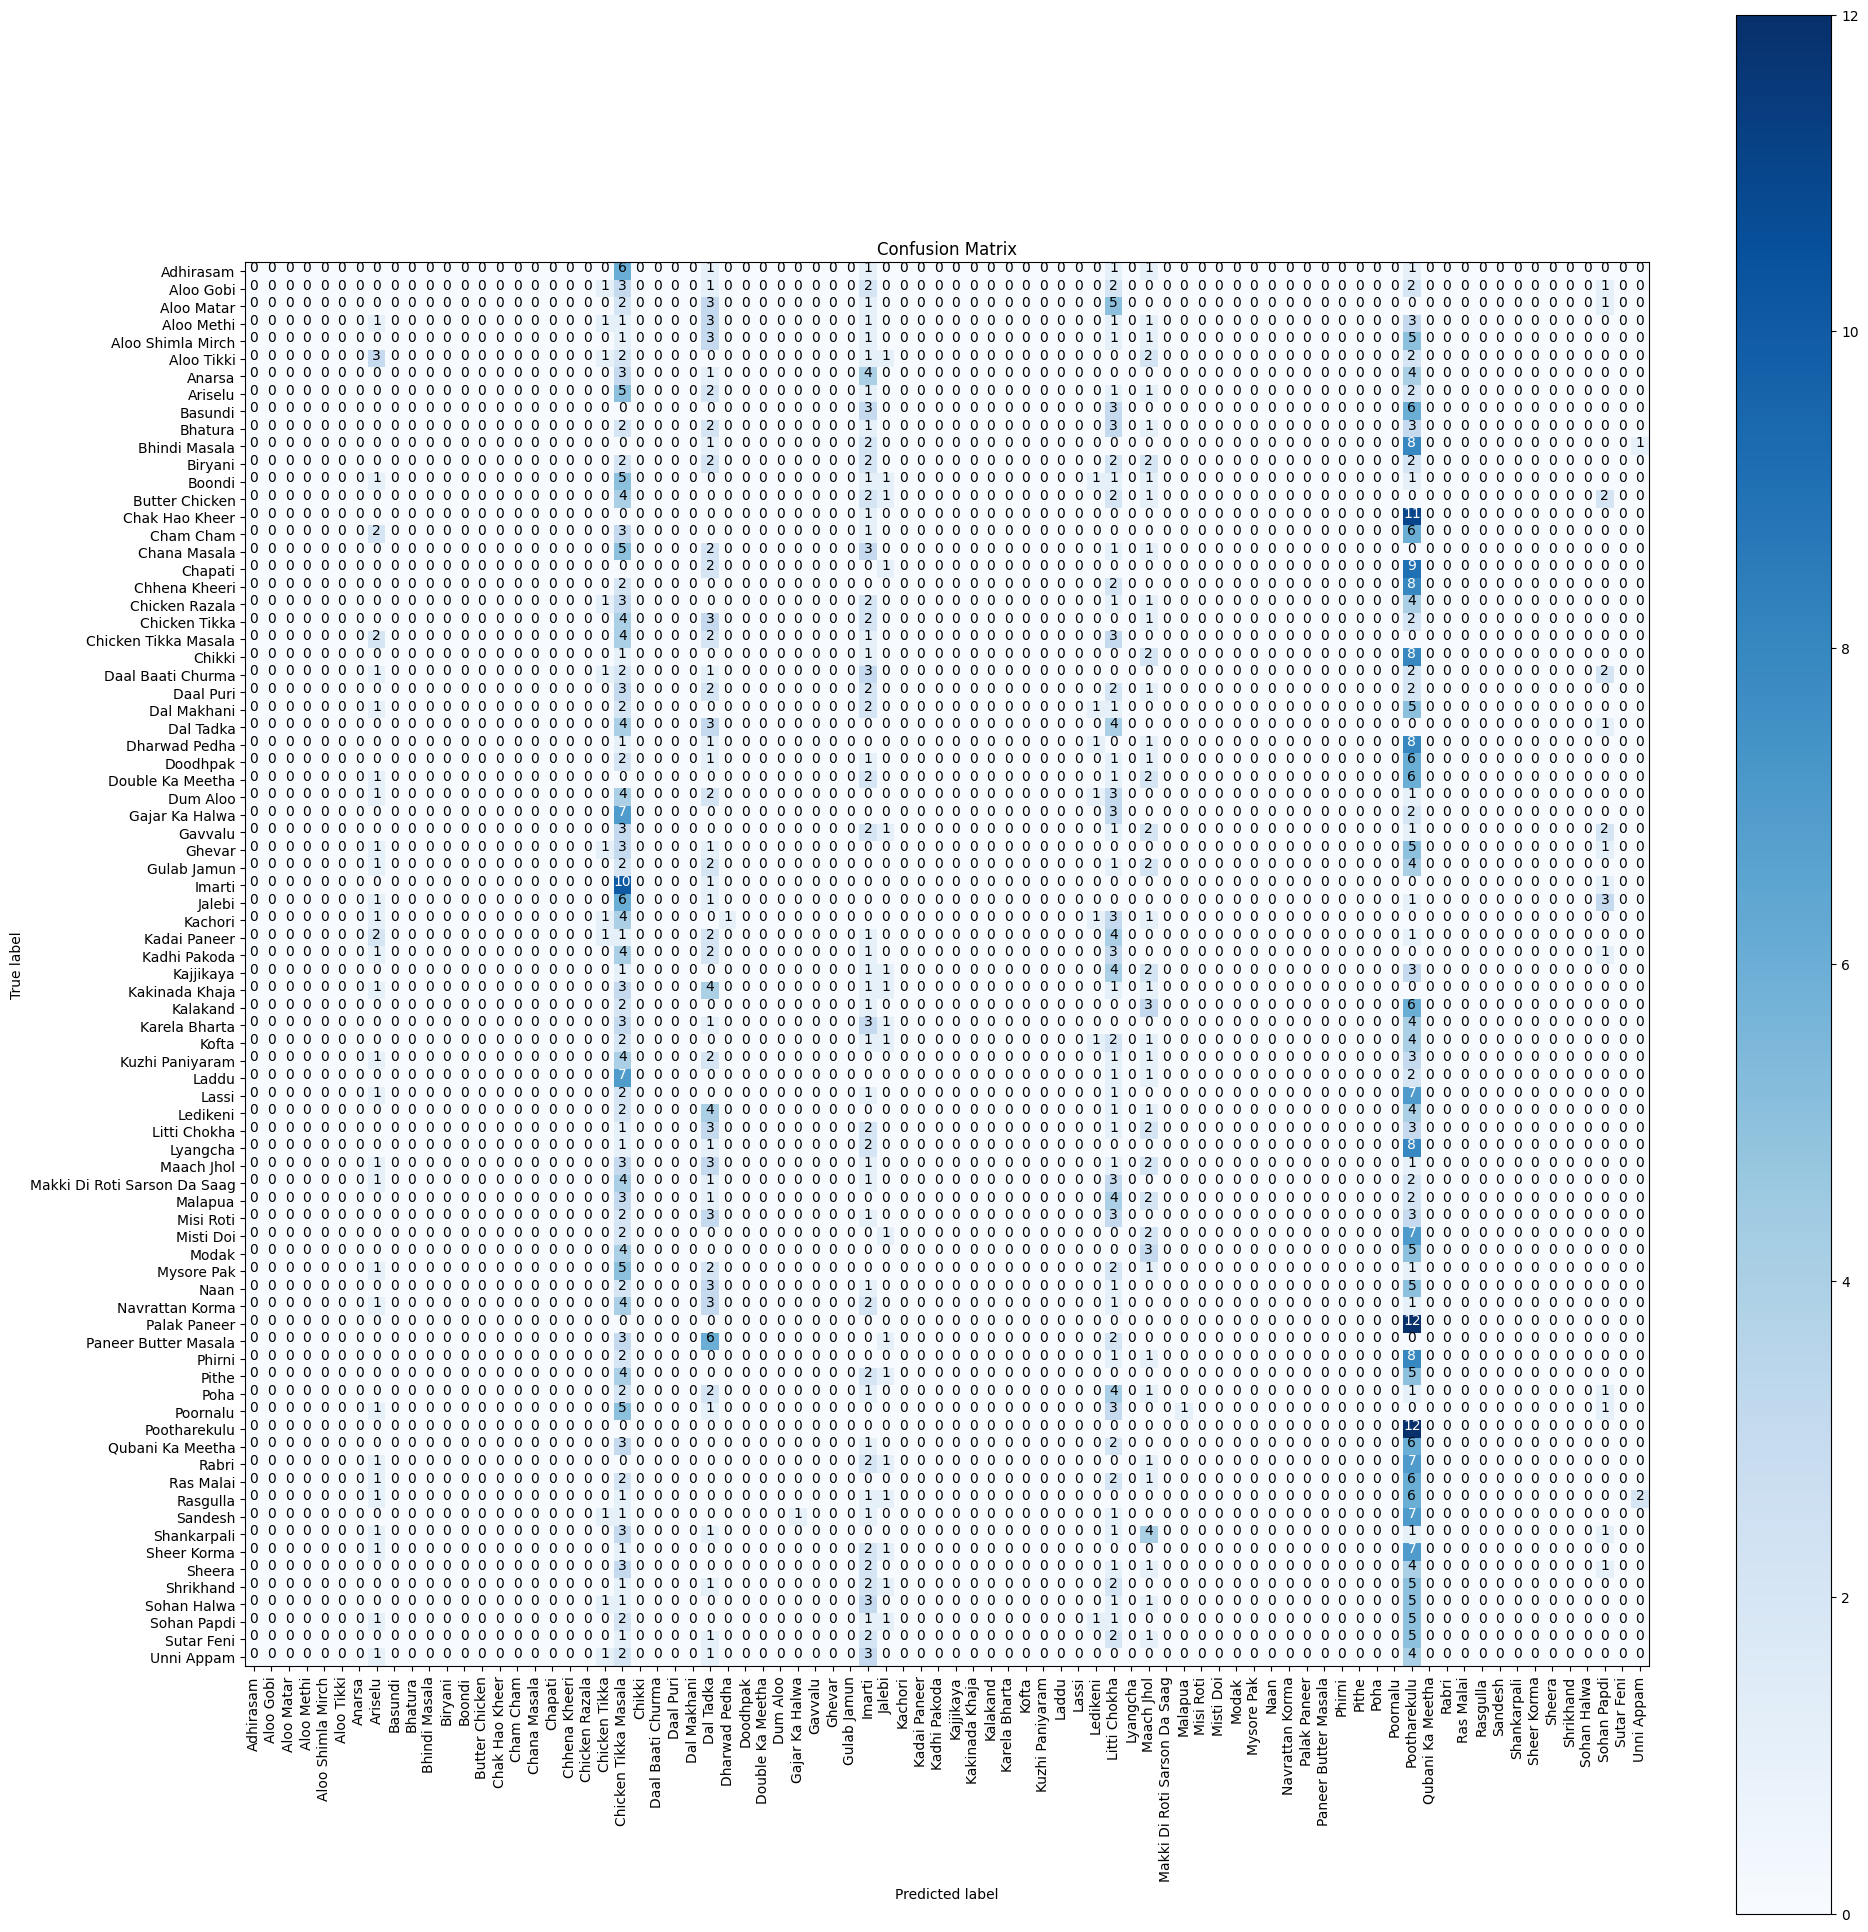

In [29]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')



In [30]:
#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
                              precision    recall  f1-score   support

                   Adhirasam       0.00      0.00      0.00        11
                   Aloo Gobi       0.00      0.00      0.00        12
                  Aloo Matar       0.00      0.00      0.00        12
                  Aloo Methi       0.00      0.00      0.00        12
           Aloo Shimla Mirch       0.00      0.00      0.00        12
                  Aloo Tikki       0.00      0.00      0.00        12
                      Anarsa       0.00      0.00      0.00        12
                     Ariselu       0.00      0.00      0.00        12
                     Basundi       0.00      0.00      0.00        12
                     Bhatura       0.00      0.00      0.00        12
               Bhindi Masala       0.00      0.00      0.00        12
                     Biryani       0.00      0.00      0.00        12
                      Boondi       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 4s 4s/step


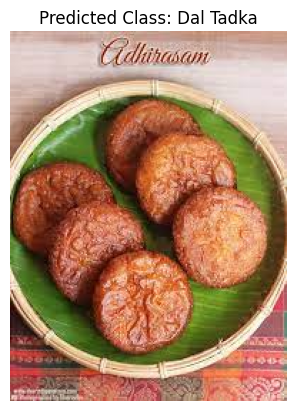

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model = load_model('model/best_model.h5')

# Function to preprocess the input image
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(256,256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Function to predict the class of the object in the image
def predict_class(img_path, model):
    preprocessed_img = preprocess_input_image(img_path)
    predictions = model.predict(preprocessed_img)
    class_index = np.argmax(predictions)
    predicted_class_label = classes[class_index]
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted Class: ' + predicted_class_label)
    plt.show()
    return predicted_class_label


input_image_path = '/content/drive/MyDrive/Colab Notebooks/dataset/test1.png'

predicted_class_label=predict_class(input_image_path, model)


In [33]:
import pandas as pd

recipe_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/recipe.csv')

# Function to get the recipe values of the predicted class
def get_recipe(predicted_class_label, recipe_data):
    # Find the row where the 'Name' column matches the predicted class label
    recipe = recipe_data.loc[recipe_data['Name'] == predicted_class_label]
    ingredients=recipe["Ingredients"].values[0]
    procedure=recipe["Procedure"].values[0]
    serving=recipe["Serving"].values[0]
    print(f"Recipe for {predicted_class_label}\n\nIngredients : {ingredients}\nProcedure : {procedure}\nServing : {serving}")
    return None

get_recipe(predicted_class_label, recipe_data)


Recipe for Dal Tadka

Ingredients : Toor dal (pigeon peas), Onions, Tomatoes, Green chilies, Ginger-garlic paste, Cumin seeds, Spices, Ghee
Procedure : Cook toor dal until soft. Sauté with onions, tomatoes, and spices. Add a tadka of cumin seeds in ghee.
Serving : Serve hot with rotis or rice.
